In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import json
from copy import deepcopy
import random
from collections import Counter
import os

# GPT

In [23]:
# gpt = json.load(open('../results/vqav2/results_cap_50_gpt.json'))

In [31]:
gpt_rerun = json.load(open('../results/vqav2/results_cap_50_rerun_gpt.json'))

In [32]:
gpt_refine = json.load(open('../results/vqav2/results_cap_50_refine_gpt.json'))

In [33]:
gpt = gpt_rerun + gpt_refine

In [44]:
# with open('../results/vqav2/results_cap_50_gpt.json', 'w') as fout:
#     json.dump(gpt, fout)

In [34]:
len(gpt)

9766

In [36]:
refine = []
rerun = []
error = []
for pair in gpt:
    new = deepcopy(pair)
    if pair['gpt_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_answer']:
        new['gpt_answer'] = 'Right'
        refine.append(new)
    elif 'Same' in pair['gpt_answer']:
        new['gpt_answer'] = 'Same'
        refine.append(new)
    elif 'Left' in pair['gpt_answer']:
        new['gpt_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

{'image_1': 'val2014/285/520427.jpg', 'image_2': 'val2014/285/256505.jpg', 'answer': 'Right', 'folder': '285', 'question': 'Which image has more people in the photo?', 'gpt_answer': {'error': {'message': "You uploaded an unsupported image. Please make sure your image is below 20 MB in size and is of one the following formats: ['png', 'jpeg', 'gif', 'webp'].", 'type': 'invalid_request_error', 'param': None, 'code': 'sanitizer_server_error'}}}
{'image_1': 'val2014/9/417857.jpg', 'image_2': 'val2014/9/538414.jpg', 'answer': 'Same', 'folder': '9', 'question': 'Which image has more people on the field?', 'gpt_answer': {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_93d0ffd9589c09db4f8aecb72fec9fb2 in your email.)', 'type': 'server_error', 'param': None, 'code': None}}}
{'image_1': 'val2014/2372/24553.

In [38]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_answer'])
    elif pair['answer'] != pair['gpt_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

In [39]:
len(correct) / (len(correct) + len(wrong))

0.6400983505788341

In [40]:
Counter(wrong_pred+correct_pred)

Counter({'Same': 956, 'Left': 4799, 'Right': 4006})

In [41]:
len(gpt)

9766

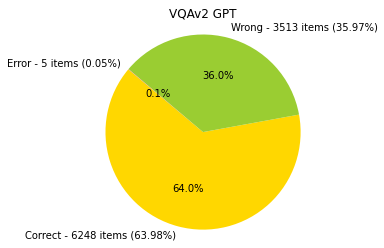

In [42]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('VQAv2 GPT')
plt.show()

# analysis

In [56]:
data = correct

In [57]:
idx = random.randint(0, len(data)-1)
print(idx)
sample = data[idx]
f, axarr = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout(pad=5.0)
axarr[0].imshow(mpimg.imread(sample['image_1']))
axarr[1].imshow(mpimg.imread(sample['image_2']))
print(sample['question'])
print(f'answer: {sample["answer"]}')
print(f'GPT answer: {sample["gpt_answer"]}')

# Gemini


In [45]:
results = json.load(open('../results/vqav2/results_cap_50_gemini.json'))

In [46]:
len(results)

9766

In [47]:
key = 'gemini_answer'

In [52]:
refine = []
rerun = []
error = []
for pair in results:
    new = deepcopy(pair)
    if pair[key] == None :
        rerun.append(pair)
    elif 'Right' in pair[key]:
        new[key] = 'Right'
        refine.append(new)
    elif 'Same' in pair[key]:
        new[key] = 'Same'
        refine.append(new)
    elif 'Left' in pair[key]:
        new[key] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'val2014/5840/259761.jpg', 'image_2': 'val2014/5840/83134.jpg', 'answer': 'Left', 'folder': '5840', 'question': 'Which image has more kids pictured?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'val2014/2561/504891.jpg', 'image_2': 'val2014/2561/152823.jpg', 'answer': 'Left', 'folder': '2561', 'question': 'Which image has more chicks?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'val2014/3144/421146.jpg', 'image_2': 'val2014/3144/553954.jpg', 'answer': 'Right', 'folder': '3144', 'question': 'Which image has more spectators?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'val2014/3144/553954.jpg', 'image_2': 'val2014/3144/180045.jpg', 'answer': 'Left', 'folder': '3144', 'question': 'Which image has more spectators?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'val2014/3667/518721.jpg', 'image_2': 'val2014/3667/166060.jpg', 'answer': 'Right', 'folder': '3667', 'question': "Which image has more spots on the giraffe's body?", 'gemini_answer': 'Gemini Error'}
{'image_1': '

In [53]:
correct = []
wrong = []

for pair in refine:
    if pair[key] == pair['answer']:
        correct.append(pair)
    elif pair[key] not in ['Left', 'Same', 'Right']:
        print(pair)
    else:
        wrong.append(pair)

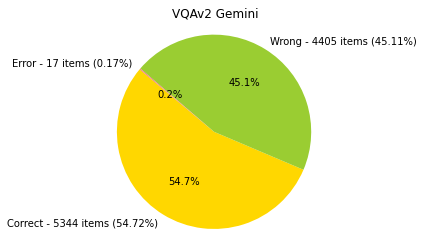

In [54]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('VQAv2 Gemini')
plt.show()

In [15]:
data = wrong

In [17]:
idx = random.randint(0, len(data)-1)
print(idx)
sample = data[idx]
f, axarr = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout(pad=5.0)
axarr[0].imshow(mpimg.imread(sample['image_1']))
axarr[1].imshow(mpimg.imread(sample['image_2']))
print(sample['question'])
print(f'answer: {sample["answer"]}')
print(f'Gemini answer: {sample[key]}')

# LLaVA-1.6

In [30]:
llava = [json.loads(q) for q in open(os.path.expanduser('../results/vqav2/results_cap_50_llava.jsonl'), "r")]

In [32]:
refine = []
rerun = []
error = []
for pair in llava:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Same' in pair['llava_answer']:
        new['llava_answer'] = 'Same'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [37]:
error

[]

In [33]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [34]:
len(correct) / (len(correct) + len(wrong))

0.4989760393200901

In [35]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 4293, 'Same': 3785, 'Left': 1688})

In [36]:
len(llava)

9766

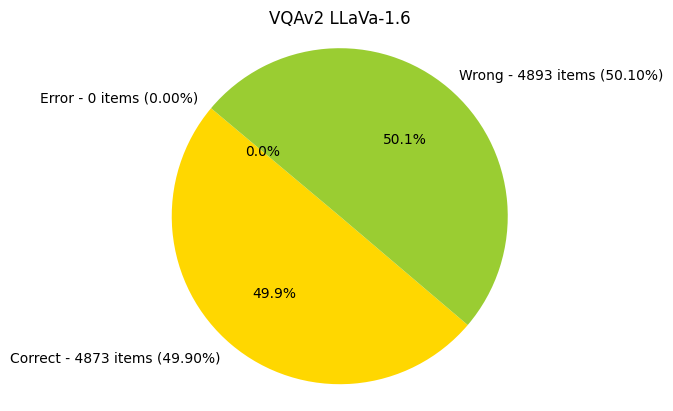

In [38]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('VQAv2 LLaVa-1.6')
plt.show()

# Vila1.5

In [3]:
vila = [json.loads(q) for q in open(os.path.expanduser('../results/vqav2/results_cap_50_vila.jsonl'), "r")]

In [4]:
refine = []
rerun = []
error = []
for pair in vila:
    new = deepcopy(pair)
    if pair['vila_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['vila_answer']:
        new['vila_answer'] = 'Right'
        refine.append(new)
    elif 'Same' in pair['vila_answer']:
        new['vila_answer'] = 'Same'
        refine.append(new)
    elif 'Left' in pair['vila_answer']:
        new['vila_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [5]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['vila_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['vila_answer']:
            correct.append(pair)
            correct_pred.append(pair['vila_answer'])
    elif pair['answer'] != pair['vila_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['vila_answer'])
    else:
        print('fuck')

In [6]:
len(correct) / (len(correct) + len(wrong))

0.47972557853778414

In [7]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 4137, 'Same': 3978, 'Right': 1651})

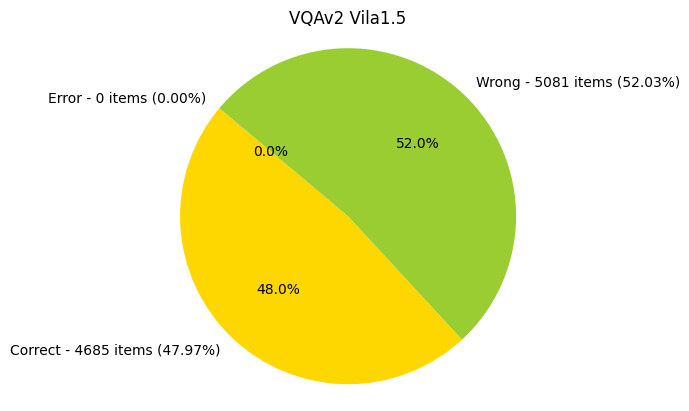

In [8]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('VQAv2 Vila1.5')
plt.show()

# LLaVA-1.6-lora-finetuned

In [4]:
llava_ft = [json.loads(q) for q in open(os.path.expanduser('../results/vqav2/results_cap_50_llava_lora_finetuned.jsonl'), "r")]

In [5]:
refine = []
rerun = []
error = []
for pair in llava_ft:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Same' in pair['llava_answer']:
        new['llava_answer'] = 'Same'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [6]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [7]:
len(correct) / (len(correct) + len(wrong))

0.5680933852140078

In [8]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 3493, 'Same': 3381, 'Left': 2892})

In [9]:
len(llava_ft)

9766

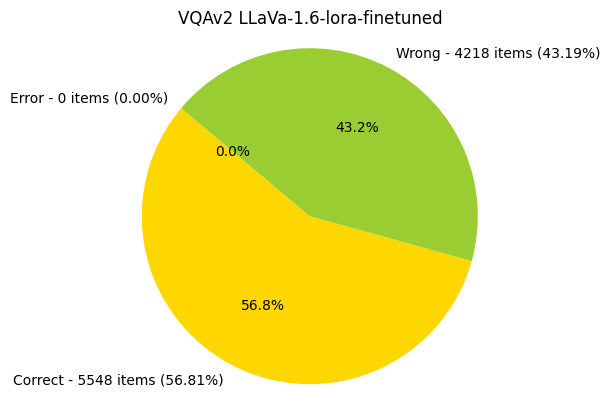

In [11]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('VQAv2 LLaVa-1.6-lora-finetuned')
plt.show()